45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

動詞を含む文節において，最左の動詞の基本形を述語とする
述語に係る助詞を格とする
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．

始める  で
見る    は を
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

コーパス中で頻出する述語と格パターンの組み合わせ
「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [7]:
import pydot

edges = [(1,2),(1,3),(1,4),(3,4)]
g = pydot.graph_from_edges(edges, directed = True)
g.write_jpeg("a.jpg", prog='dot')

True

In [12]:
#44. 係り受け木の可視化
#与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

# 41の結果を利用しarticleというデータリストを作成

import re

class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

    def __repr__(self):
        return "surface: %s base: %s pos: %s pos1: %s " % (self.surface, self.base, self.pos, self.pos1)

class Chunk:
    def __init__(self, no,dst):
        self.no = no
        self.morphs = []
        self.dst = dst
        self.srcs = []

    def __repr__(self):
        return "no: %s morphs: %s dst: %s srcs: %s　\n" % (self.no, self.morphs, self.dst, self.srcs)

data = []
#ファイル読み込み
with open('neko.xml.cabocha', "r") as f:
    data = f.read().split('\n')

article = []
sentence = []
chunk = None
edges = []
for line in data:
    if re.search('<chunk', line):
        search_no = re.search('(id=\")(.+?)(\"\slink)', line)
        no = search_no.group(2)

        search_dst = re.search('(link=\")(.+?)(\"\srel)', line)
        dst = search_dst.group(2)

        chunk = Chunk(no, dst)

    elif re.search('<tok', line):
        tok = re.search('(feature=\")(.+?)(\">)', line)
        pos = re.split(',', tok.group(2))
        sfc = re.search('(\">)(.+?)(</tok>)', line)
        chunk.morphs.append(Morph(
            sfc.group(2),
            pos[6],
            pos[0],
            pos[1],
        ))

    elif line == ' </chunk>':
        if chunk:
            sentence.append(chunk)
        chunk = []

    elif line == '</sentence>':
        if sentence:

            # srcsをセット
            for ch in sentence:
                getdst = int(getattr(ch, "dst"))
                dstfrom = getattr(ch, "no")
                if getdst > 0:
                    dstto = sentence[getdst] #リンク先のチャンク
                    dstto.srcs.append(dstfrom) # リンク先チャンクのsrcsにdstfromを追加

            # sentenceのリストをarticleに追加
            article.append(sentence)
            sentence = []

#チャンク内の各単語をまとめる関数
def comWords(cnk):
    words = ""
    for mrp in cnk.morphs:
        words += getattr(mrp, "surface")
    return words


## 44の回答

#チャンク内の各単語をまとめる関数
def comWords(cnk):
    words = ""
    for mrp in cnk.morphs:
        words += getattr(mrp, "surface")
    return words

# 42の回答
# 係り受け木のedgeを作成
import pydot

for i, stc in enumerate(article[:10]):
    edges = []
    for cnk in stc:
        if cnk.srcs:
            endwords = comWords(cnk)
            for src in cnk.srcs:
                startcnk = stc[int(src)]
                startwords = comWords(startcnk)
                edges.append((startwords, endwords))
        g = pydot.graph_from_edges(edges, directed = True)
        g.write_jpeg("{}.jpg".format(i), prog='dot')







41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ．

In [421]:
import re

# 前処理はXML形式のほうがいいかもという気がしたのでファイルを再度作成
## cabocha -f3 neko.txt -o neko.xml.cabocha

class Morph:
    def __init__(self, base, pos, pos1):
        self.base = base
        self.pos = pos
        self.pos1 = pos1
        
    def toList(self):
        return([self.base, self.pos, self.pos1])


#class Chunkを定義
class Chunk:
    def __init__(self, no,dst):
        self.no = no
        self.morphs = []
        self.dst = dst
        self.srcs = []        
    
    def print(self):
        print(self.no)
        print([x.toList() for x in self.morphs])
        print(self.dst, self.srcs)
        print() #なぞ
        
#ファイル読み込み
with open('neko.xml.cabocha', "r") as f:
    data = f.read().split('\n')
    
# ここから41
# articleはsentenceのリスト
# sentenceはchunkのリスト
# chunkはid、morphs、dst、srcsのリスト
# morphsはmorphのリスト

article = []
sentence = []
chunk = []
for line in data:
    if re.search('<chunk', line):
        search_no = re.search('(id=\")(.+?)(\"\slink)', line)
        no = search_no.group(2)
        
        search_dst =  re.search('(link=\")(.+?)(\"\srel)', line)
        dst = search_dst.group(2)
        
        chunk = Chunk(no, dst)
        
    elif re.search('<tok', line):
        tok = re.search('(feature=\")(.+?)(\">)', line)
        pos = re.split(',', tok.group(2))
        chunk.morphs.append(Morph(
            pos[6],
            pos[0],
            pos[1],
        ))
                
    elif line == '</chunk>':
        if chunk:
            sentence.append(chunk)
        chunk = []
    
    elif line == '</sentence>':
        if sentence:
            article.append(sentence)
        sentence = []




In [ ]:
import re

#Classを定義
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
        
    def print(self):
        print([self.surface, self.base, self.pos, self.pos1])

        
class Chunk:
    def __init__(self, number, dst):
        self.number = number
        self.morphs = []
        self.dst = dst
        self.srcs = []
    
    def print(self):
        print(self.number)

        
        
#ファイル読み込み
with open('neko.txt.cabocha', "r") as f:
    data = f.read().split('\n')

# 各形態素をリストに格納
# 結果 ⇒　POS_list[6] = ['猫', '名詞', '一般', '*', '*', '*', '*', '猫', 'ネコ', 'ネコ']

article = []
sentence = []
for line in data:
    if line[:1] == '*': #最初の文字が* からはじまる箇所は除去も除去
        continue
    elif line == 'EOS': #EOSを除去しないとリストの項目数が揃わず後でエラーが出る
        if sentence:
            article.append(sentence)
        sentence = []
    else:
        POS = re.split(',|\\t', line)
        sentence.append(POS)


#article2 = article[0:-1] #最後に空のリストが入ってしまいリストの項目数が揃わない現象への対応

# 必要項目を抽出したリストの作成
datalist = []
for line in article2[3]:
    datalist.append(Morph(
        line[0],
        line[7],
        line[1],
        line[2],
    ))

for morph in datalist:
        morph.print()


In [ ]:
31. 動詞
動詞の表層形をすべて抽出せよ．

In [344]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

   
POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)
    
#ここから問題31。posが動詞になっているもののsurfaceを抽出すればOK
v_list = []
for line in datalist:
    if line['pos'] == '動詞':
        v_list.append(line['surface'])


 

[['一', '名詞', '数', '*', '*', '*', '*', '一', 'イチ', 'イチ'],
 ['\u3000', '記号', '空白', '*', '*', '*', '*', '\u3000', '\u3000', '\u3000'],
 ['吾輩', '名詞', '代名詞', '一般', '*', '*', '*', '吾輩', 'ワガハイ', 'ワガハイ'],
 ['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ'],
 ['猫', '名詞', '一般', '*', '*', '*', '*', '猫', 'ネコ', 'ネコ'],
 ['で', '助動詞', '*', '*', '*', '特殊・ダ', '連用形', 'だ', 'デ', 'デ'],
 ['ある', '助動詞', '*', '*', '*', '五段・ラ行アル', '基本形', 'ある', 'アル', 'アル'],
 ['。', '記号', '句点', '*', '*', '*', '*', '。', '。', '。'],
 ['名前', '名詞', '一般', '*', '*', '*', '*', '名前', 'ナマエ', 'ナマエ'],
 ['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ'],
 ['まだ', '副詞', '助詞類接続', '*', '*', '*', '*', 'まだ', 'マダ', 'マダ'],
 ['無い', '形容詞', '自立', '*', '*', '形容詞・アウオ段', '基本形', '無い', 'ナイ', 'ナイ'],
 ['。', '記号', '句点', '*', '*', '*', '*', '。', '。', '。'],
 ['\u3000', '記号', '空白', '*', '*', '*', '*', '\u3000', '\u3000', '\u3000'],
 ['どこ', '名詞', '代名詞', '一般', '*', '*', '*', 'どこ', 'ドコ', 'ドコ'],
 ['で', '助詞', '格助詞', '一般', '*', '*', '*', 'で', 'デ', 'デ'],
 ['生れ', '動詞',

In [ ]:
32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [225]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)
    
#ここから問題32。posが動詞になっているもののbaseを抽出すればOK?
v_list = []
for line in datalist:
    if line['pos'] == '動詞':
        v_list.append(line['base'])

print(v_list)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'のむ', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '

33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [230]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)
    
#ここから問題33。posが名詞・pos1がサ変接続になっているもののsurfaceを抽出すればOK?
sa_list = []
for line in datalist:
    if line['pos'] == '名詞' and line['pos1'] == 'サ変接続':
        sa_list.append(line)


[{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '話', 'base': '話', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '装飾', 'base': '装飾', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '突起', 'base': '突起', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '運転', 'base': '運転', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '分別', 'base': '分別', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '決心', 'base': '決心', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '我慢', 'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '餓死', 'base': '餓死', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '訪問', 'base': '訪問', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '始末', 'base': '始末', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '猶予', 'base': '猶予', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '遭遇', 'base': '遭遇', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': '我慢', 'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface

34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [235]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)
    
#ここから問題34。「posが名詞・surfaceが"の"・posが名詞」の順番に並んでいる箇所を発見すればOK?
np_list = []

datalist2 = datalist[1:]
datalist3 = datalist[2:]

for line, line2, line3 in zip(datalist, datalist2, datalist3):
    if line['pos'] == '名詞' and line2['surface'] == 'の' and line3['pos'] == '名詞' :
        np = [line['surface'], line2['surface'], line3['surface']]
        np_list.append(np)

np_list

[['彼', 'の', '掌'],
 ['掌', 'の', '上'],
 ['書生', 'の', '顔'],
 ['はず', 'の', '顔'],
 ['顔', 'の', '真中'],
 ['穴', 'の', '中'],
 ['書生', 'の', '掌'],
 ['掌', 'の', '裏'],
 ['何', 'の', '事'],
 ['肝心', 'の', '母親'],
 ['藁', 'の', '上'],
 ['笹原', 'の', '中'],
 ['池', 'の', '前'],
 ['池', 'の', '上'],
 ['一樹', 'の', '蔭'],
 ['垣根', 'の', '穴'],
 ['隣家', 'の', '三'],
 ['時', 'の', '通路'],
 ['一刻', 'の', '猶予'],
 ['家', 'の', '内'],
 ['彼', 'の', '書生'],
 ['以外', 'の', '人間'],
 ['前', 'の', '書生'],
 ['おさん', 'の', '隙'],
 ['おさん', 'の', '三'],
 ['胸', 'の', '痞'],
 ['家', 'の', '主人'],
 ['主人', 'の', '方'],
 ['鼻', 'の', '下'],
 ['吾輩', 'の', '顔'],
 ['自分', 'の', '住'],
 ['吾輩', 'の', '主人'],
 ['家', 'の', 'もの'],
 ['うち', 'の', 'もの'],
 ['彼', 'の', '書斎'],
 ['本', 'の', '上'],
 ['皮膚', 'の', '色'],
 ['本', 'の', '上'],
 ['彼', 'の', '毎夜'],
 ['以外', 'の', 'もの'],
 ['主人', 'の', '傍'],
 ['彼', 'の', '膝'],
 ['膝', 'の', '上'],
 ['経験', 'の', '上'],
 ['飯櫃', 'の', '上'],
 ['炬燵', 'の', '上'],
 ['ここ', 'の', 'うち'],
 ['供', 'の', '寝床'],
 ['彼等', 'の', '中間'],
 ['供', 'の', '一'],
 ['例', 'の', '神経'],
 ['性', 'の', '主人'],
 ['次', 'の', '部屋'],

35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [285]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)

    
#ここから問題35。
count = 0
nseq = []
sol = []
for line in datalist:
    if line['pos'] == '名詞' :
        nseq.append(line['surface'])
        count += 1
    else:
        if count > 1:
            sol.append(nseq)
        count = 0
        nseq = []

sol

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': '生れ

36 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [292]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)


#ここから問題36
##DatalistからSurfaceだけを並べたリストをつくる(Counterがリストしか受け付けてくれないので)
surface_list = []
for line in datalist:
    surface_list.append(line['surface'])

##Counterで数え上げる
from collections import Counter
counter = Counter(surface_list)
for word, count in counter.most_common():
    print(word, count)




の 9194
。 7486
て 6868
、 6772
は 6420
に 6243
を 6071
と 5508
が 5337
た 3988
で 3806
「 3231
」 3225
も 2479
ない 2390
だ 2363
し 2322
から 2032
ある 1728
な 1613
ん 1568
か 1530
いる 1249
事 1207
へ 1034
う 992
する 992
もの 981
君 973
です 973
云う 937
主人 932
よう 696
ね 683
この 649
御 636
ば 617
人 602
その 576
一 554
そう 546
何 539
なる 531
さ 514
よ 509
なら 483
吾輩 481
い 478
ます 458
じゃ 448
… 433
これ 414
　 411
なっ 404
それ 381
来 364
れ 356
見 350
でも 346
時 345
迷亭 343
ませ 330
いい 320
三 319
—— 319
まで 313
ところ 313
方 312
二 303
ず 299
上 294
まし 289
寒月 286
顔 282
ぬ 277
先生 274
見る 273
人間 272
だろ 270
くらい 269
僕 268
たら 262
さん 260
なく 258
気 250
あり 249
猫 248
だけ 246
出 245
出来 244
云っ 241
また 238
中 234
思っ 232
ばかり 231
十 231
ごとく 225
あっ 221
どう 220
って 216
細君 213
など 205
鼻 199
今 195
大 195
や 194
者 194
そんな 194
あの 189
しかし 185
てる 182
より 181
ながら 179
自分 175
ので 175
少し 172
頭 169
ちょっと 169
でしょ 162
訳 159
前 158
日 154
声 154
かい 153
うち 152
ただ 150
知れ 150
ほど 150
聞い 150
として 149
私 149
だって 148
男 147
思う 146
たい 146
行っ 144
せ 143
家 143
子 143
眼 142
？ 141
ため 140
見え 139
よく 138
出し 137
彼 134
誰 133
たり 1

新 9
早々 9
劇 9
小さな 9
払っ 9
糞 9
特色 9
界 9
乏しい 9
証拠 9
面目 9
それほど 9
出よ 9
叩く 9
ならん 9
せい 9
椀 9
ほんとに 9
利い 9
切ら 9
衣服 9
今朝 9
疑 9
借り 9
食べ 9
笑わ 9
実行 9
美 9
形容 9
はい 9
はあ 9
ち 9
世話 9
四角 9
張る 9
ぽか 9
如何 9
行こ 9
とく 9
買わ 9
遺憾 9
賛成 9
敬服 9
類 9
堤 9
顔色 9
懸 9
女学生 9
苦し 9
候え 9
大兄 9
を以て 9
学 9
歓迎 9
一時 9
最初 9
風邪 9
押し 9
遊ん 9
喋 9
親 9
働 9
下げ 9
重 9
飛び下り 9
在っ 9
述べる 9
降りる 9
飲め 9
太平 9
流れ 9
好ん 9
写真 9
偶然 9
からかっ 9
価 9
フロック 9
行わ 9
直ちに 9
式 9
英国 9
仮令 9
籠 9
睨め 9
勢力 9
起ら 9
放っ 9
付ける 9
店 9
恭しく 9
与える 9
達し 9
作り 9
ごと 9
困ら 9
癇癪 9
いただき 9
発展 9
薄 9
刺激 9
根 9
鳴い 9
差し支え 9
丁 9
軒 9
草 9
生 9
見廻 9
珍客 9
株 9
号 9
あらゆる 9
状態 9
折れ 9
大将 9
洗湯 9
塊 9
女子 9
石炭 9
飛び込む 9
遊戯 9
いやしくも 9
かさ 9
猿股 9
記述 9
つら 9
思 9
きたない 9
作家 9
倫理 9
常識 9
電光 9
雑巾 9
古井 9
浜田 9
善 9
残っ 8
をもって 8
薬缶 8
弱っ 8
痛い 8
棄て 8
分別 8
試み 8
臭い 8
破れ 8
蔭 8
あるい 8
抛り出し 8
隙 8
ぶら下げ 8
眠く 8
乗る 8
構い 8
質 8
だり 8
板の間 8
親子 8
待つ 8
失敗 8
だらけ 8
時に 8
覚め 8
たまらない 8
あえて 8
波 8
これら 8
小便 8
軽く 8
額 8
暮し 8
問答 8
いつも 8
咽喉 8
呼吸 8
答 8
揚げ 8
反対 8
化 8
嬉しい 8
下手 8
名文 8
近く 8
嫌い 8
際限 8
竪 8
上品 8
せめて 8
応用 8
同類 8
信じ 8
活版 8
握っ 8
濶 8
未だ 8
公 8
有り 8
文句 8


広げ 3
小生 3
由 3
食 3
保持 3
秘法 3
入浴 3
嘔吐 3
又 3
生ぜ 3
到着 3
擅 3
スミス 3
青 3
嬉しく 3
たべ 3
雅 3
咳 3
のう 3
ペスト 3
野良猫 3
重た 3
寸法 3
法螺吹き 3
ござら 3
馬子 3
借金 3
題 3
本文 3
投げ 3
擲つ 3
此度 3
黒白 3
あくまでも 3
退治 3
ほのめかす 3
至って 3
初対面 3
かし 3
踏ん 3
吐き 3
出口 3
膝頭 3
宮 3
復讐 3
格 3
高話 3
露西亜 3
無常 3
迅速 3
ぶら下がっ 3
下がっ 3
危ない 3
結び目 3
美的 3
引き返し 3
ひねくる 3
感応 3
灰 3
丁寧 3
刻 3
令夫人 3
集っ 3
帰ろ 3
剤 3
今時分 3
呼ば 3
すかし 3
訴える 3
糸 3
飛び上がっ 3
寒く 3
摂津 3
くれろ 3
賑やか 3
引き下がっ 3
交渉 3
手続き 3
踏ま 3
常 3
規 3
はいら 3
帰ら 3
速 3
the 3
横文字 3
聞こ 3
水薬 3
無かっ 3
注い 3
柱時計 3
名医 3
理解 3
潰す 3
かれ 3
談笑 3
雲 3
深き 3
転 3
浮かば 3
信女 3
仏壇 3
動かさ 3
過 3
途切れる 3
達者 3
類似 3
坊さん 3
しばしば 3
深い 3
寄りつい 3
放逐 3
描く 3
鈍 3
さほど 3
寄せ 3
忘却 3
昨今 3
同等 3
思想 3
致そ 3
発する 3
新た 3
はたと 3
改める 3
録 3
宛 3
一気呵成 3
ごたごた 3
下ろし 3
出直す 3
親指 3
人さし指 3
今月 3
種々 3
真白 3
しかめ 3
抜い 3
大学院 3
計ら 3
攫ん 3
卸し 3
猫又 3
ずくめ 3
善人 3
説教 3
溜っ 3
書籍 3
後学 3
乗 3
掛る 3
予言 3
代価 3
ごとし 3
忘 3
商 3
合わせる 3
不満 3
遊ぶ 3
守る 3
さし 3
午後 3
願お 3
コップ 3
置 3
絞 3
刑 3
太 3
本題 3
絞殺 3
今晩 3
フ 3
一端 3
申さ 3
釣ら 3
度合 3
1 3
首脳 3
伺う 3
ぱちぱち 3
論じ 3
受 3
死ね 3
仰山 3
埒 3
正に 3
江戸 3
連 3
災 3
売っ 3
鳶口 3
ぽつぽつ 3


独創 2
一代 2
驚嘆 2
立場 2
無能力 2
成算 2
杓子 2
造ろ 2
陥っ 2
徹頭徹尾 2
ラファエル 2
違わ 2
筆法 2
毛頭 2
野心 2
人真似 2
天日 2
推知 2
大目 2
疑っ 2
逞 2
芽生え 2
植え付け 2
苦味 2
口先 2
才気 2
差し出し 2
満身 2
琴瑟 2
放り込ん 2
唐桟 2
むすん 2
噛ま 2
引き込ま 2
静まり返っ 2
知らず 2
寝言 2
越え 2
漠然と 2
帰省 2
愚か 2
知ろ 2
合し 2
盗む 2
くるみ 2
膨れ 2
青大将 2
上着 2
拡げ 2
吸っ 2
吐き出し 2
遠のい 2
暫時 2
続か 2
時半 2
盗賊 2
焦れ 2
書面 2
届 2
呼びつけ 2
宿場 2
繻子 2
腹合せ 2
一筋 2
掘っ 2
たまる 2
ざんす 2
品数 2
威勢 2
法科 2
寿司 2
そげん 2
あさま 2
直径 2
達 2
ボールド 2
下さら 2
げん 2
不断 2
係わら 2
世に 2
日に日に 2
狡猾 2
卑劣 2
着ける 2
じゃろ 2
銷沈 2
朗吟 2
小石川 2
困窮 2
近々 2
逡巡 2
上野公園 2
乞う 2
吹き込ん 2
自弁 2
多恨 2
罵っ 2
使役 2
端折っ 2
静坐 2
修行 2
態 2
凡眼 2
知識 2
心得る 2
浅薄 2
退い 2
少なし 2
ゆる 2
天命 2
娑婆 2
徒 2
大いに 2
擒 2
引っ掻い 2
禅師 2
賢しゅう 2
とれん 2
花吹雪 2
手桶 2
あらかじめ 2
地形 2
酒屋 2
すれすれ 2
仰向け 2
届か 2
しみじみ 2
てんで 2
居眠り 2
山芋 2
人力 2
迂回 2
そうしたら 2
仰ぐ 2
地獄 2
警戒 2
花嫁 2
おめでたい 2
計略 2
選ん 2
バル 2
チック 2
艦隊 2
ぬう 2
眸 2
飾る 2
あらし 2
わい 2
現在 2
ひらり 2
こす 2
崇高 2
避 2
ぶら下がる 2
だらり 2
手懸り 2
砕けよ 2
離 2
危うい 2
ぎりぎり 2
失う 2
転がり 2
胴間声 2
細く 2
やり切れない 2
押し通す 2
雑多 2
暮さ 2
衣食 2
包む 2
鋸 2
等分 2
人為 2
刈っ 2
真直 2
マイナス 2
新奇 2
到来 2
考案 2
よけれ 2
通さ 2
永らく 

嘔気 1
おして 1
ゲー 1
執念深く 1
チンチンチンチン 1
取り上げる 1
吐き気 1
ぞくぞく 1
嬉しかっ 1
語り 1
咳払い 1
悲しく 1
偏狭 1
所得 1
超然と 1
娑婆気 1
日常 1
ちらちら 1
ほのめい 1
罵倒 1
俗骨 1
半可通 1
取り得 1
来よ 1
庭口 1
門松 1
飾り 1
取り払わ 1
うらら 1
四海 1
元日 1
曙光 1
鮮 1
人影 1
ひっそり 1
うとうと 1
うたた寝 1
剥げる 1
位牌 1
蒲団 1
木彫 1
悪う 1
ぎまさあね 1
人様 1
かたき 1
しどころ 1
早死 1
可愛らしい 1
いたっ 1
はおり 1
身代り 1
心残り 1
果報者 1
早う 1
浄土 1
すべり 1
毛髪 1
にたて 1
身震い 1
慵 1
無性 1
閉じ 1
評する 1
虐待 1
甚五郎 1
楼門 1
刻み 1
スタンラン 1
似顔 1
カンヴァス 1
瞎漢 1
岡山 1
届け 1
接近 1
糾合 1
雌雄 1
決し 1
性情 1
一身 1
安き 1
むるところで 1
変心 1
裏切り 1
評せ 1
貧乏性 1
習癖 1
脱化 1
気位 1
言行 1
わが物顔 1
撮っ 1
見解 1
用紙 1
卸す 1
序開き 1
筆太 1
穂 1
真一文字 1
改めれ 1
賛 1
言文 1
書き流し 1
消そ 1
併行 1
捻り出し 1
見幕 1
ねじ上げ 1
ねじ 1
銅鑼 1
足りん 1
薬礼 1
本屋 1
余ら 1
抜き取っ 1
上ら 1
植付け 1
感じ入っ 1
粘着 1
飛ば 1
突き戻す 1
経済 1
追払っ 1
蛇足 1
抹殺 1
已めろ 1
筆誅 1
余す 1
十文字 1
文人 1
蘭 1
連ね 1
舞い込む 1
題目 1
本堂 1
力石 1
接待 1
無愛想 1
蒔い 1
イヨー 1
襟髪 1
おどる 1
暴く 1
宙乗り 1
悪かっ 1
おどり 1
相好 1
針仕事 1
注ぎ 1
ジヤスターゼ 1
損害 1
償お 1
めさ 1
父様 1
世帯 1
丸善 1
月末 1
月々 1
憮然 1
削減 1
唐人 1
お待ち 1
こうっ 1
タークイン・ゼ・プラウド 1
くべる 1
焚け 1
ありがた味 1
むのですけれど 1
考えつい 1
詰め込む 1
行雲流水 1
忽ち 1
逝い 1
すまい 1
別途 1
不即不

おんなじ 1
高浜 1
灯心 1
透綾 1
薩摩 1
飛白 1
端折り 1
着付け 1
陸軍 1
御用達 1
浴び 1
秒 1
拍子木 1
あっけない 1
加味 1
笑われる 1
憤 1
新説 1
感情 1
感じる 1
どうのこうの 1
惚れ込ん 1
拡張 1
稿本 1
袱紗 1
見せよ 1
避暑 1
真面目くさっ 1
まずかっ 1
かに 1
雅言 1
たよ 1
字義 1
危う 1
もてなす 1
はぐっ 1
巻頭 1
倦ん 1
薫ずる 1
たなびき 1
辛き 1
あまく 1
熱き 1
停車場 1
訓 1
学究 1
一夜 1
取り留め 1
からき 1
あまき 1
あまい 1
からい 1
反照 1
七味 1
唐辛子 1
独特 1
御作 1
短文 1
座興 1
僅 1
手製 1
ほめる 1
掏摸 1
一躍 1
そり返っ 1
山師 1
人殺し 1
行き過ぎ 1
聞こえ 1
文才 1
面白う 1
ぎはしませんか 1
杳然 1
懇意 1
詠ん 1
集中 1
寄合 1
火の手 1
下火 1
綴る 1
傾く 1
つくつく法師 1
懸命 1
冷罵 1
申し聞ける 1
近年 1
貴人 1
腐れ 1
浴びろ 1
飛び込め 1
霞 1
神国 1
輓近 1
罹り 1
ふわ 1
短い 1
短日月 1
年月 1
星霜 1
寝小便 1
おっぱい 1
憂い 1
たわい 1
転地 1
療養 1
海岸 1
薨去 1
唱え 1
寂滅 1
ごねる 1
洋 1
往復 1
渺々 1
漫々 1
大海 1
続けざま 1
古往今来 1
断案 1
潮水 1
〇 1
リチャード 1
ラッセル 1
ブライトン 1
飛込め 1
四百四病 1
広告 1
味わう 1
築地 1
瀾怒 1
濤 1
取りあえず 1
取り極め 1
貧民 1
人聞き 1
ひっくり返る 1
ひっくり返っ 1
両面 1
一物 1
天の橋立 1
偶 1
ハムレット 1
ラケット 1
抱く 1
機械 1
バット 1
取り扱い 1
歩く 1
対象 1
取り去る 1
索然 1
没趣味 1
興奮 1
廂 1
天辺 1
花形 1
滑べっ 1
飛びつく 1
高々 1
紙袋 1
表紙 1
見付かる 1
手先 1
働か 1
旧式 1
新式 1
さがし 1
すわ 1
ふり 1
健気 1
軟かい 1
ぐにゃり 1
下着 1
いす 1
飛ばさ 1
立木 1
飛鳥 1
逃げ延び 1


かぎっ 1
持説 1
久留米がすり 1
伊予 1
着こなし 1
襯衣 1
素袷 1
むさ 1
印し 1
畏し 1
こまっ 1
かしこまる 1
つんつるてん 1
不調和 1
構える 1
箝束 1
微々たる 1
聚合 1
排斥 1
しでかす 1
臆病者 1
騒ぎ出す 1
酔っ払っ 1
取り落し 1
ばか 1
老朽 1
苟 1
剥げ 1
乗ん 1
つくねんと 1
見詰める 1
仕入れ 1
毀損 1
祖父 1
法事 1
しびれ 1
集まっ 1
碗 1
痛み入っ 1
小笠原 1
手つき 1
突きつけ 1
同年輩 1
比すれ 1
据わっ 1
無念 1
はらはら 1
一滴 1
目立っ 1
引き込ん 1
入学 1
感銘 1
推諒 1
嚆矢 1
教えろ 1
吃 1
姫 1
語勢 1
変え 1
つけ加え 1
ちまっ 1
平助 1
遠藤 1
退学 1
書きゃ 1
お母さん 1
継母 1
飽くまでも 1
もったいぶっ 1
平然たる 1
騒ぎ立て 1
られれ 1
及雪 1
波動 1
伝える 1
別々 1
やかましくっ 1
おっかさん 1
継子 1
情深い 1
思いやり 1
受け取り 1
賦 1
部類 1
内部 1
隠す 1
かくそ 1
望ん 1
志乃 1
文吾 1
両隣 1
八犬伝 1
跨い 1
躍り込ん 1
病ん 1
仏陀 1
福音 1
筋道 1
ちょっとした 1
とんだ 1
功名 1
はちきれん 1
無意識 1
砲丸 1
飲み下し 1
切な 1
出向い 1
同級生 1
からかお 1
ただに 1
切に 1
真人間 1
移る 1
居住 1
聞き返し 1
誘い 1
赤坂 1
無闇 1
ぼん 1
自転車 1
矚目 1
仇 1
会釈 1
老木 1
森々 1
昼間 1
万丈 1
都会 1
迷い込ん 1
闃寂 1
振い落す 1
探検 1
浪々 1
アンチモニー 1
協商 1
放さ 1
あばか 1
流れ込む 1
張れ 1
張れれ 1
超絶 1
ファンクション 1
訣別 1
薩摩下駄 1
打ちゃ 1
吟 1
糺せ 1
取り殺し 1
訳す 1
降り込ん 1
奇談 1
手分け 1
無茶 1
恐ろしく 1
悄々 1
思潮 1
いたずらに 1
奴ら 1
片っ端 1
帰国 1
対坐 1
勝負 1
成敗 1
度外 1
岫 1
冉 1
個中 1
仙骨 1
宛然 1
狭苦しく 1
眩む 1
ならべる 1
あぶら 1
面積

37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

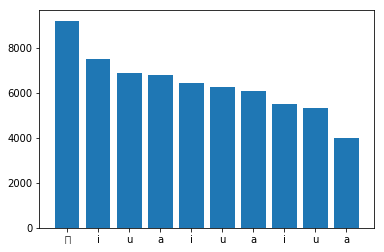

In [309]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)


#ここから問題37
surface_list = []
for line in datalist:
    surface_list.append(line['surface'])

#Counterで数え上げ、上位10語のリストを作る
from collections import Counter

counter = Counter(surface_list)

wordlist = []
countlist = []
for word, count in counter.most_common():
    wordlist.append(word)
    countlist.append(count)


wordlist10 = wordlist[0:10]
countlist10 = countlist[0:10]

#グラフ作成

import numpy as np
import matplotlib.pyplot as plt

left = np.array([1,2,3,4,5,6,7,8,9,10])
height = np.array(countlist10)
plt.bar(left, height, tick_label=wordlist10)


38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

(array([0.000e+00, 6.192e+03, 2.268e+03, 1.114e+03, 6.880e+02, 5.360e+02,
        3.490e+02, 2.780e+02, 2.400e+02, 1.710e+02, 1.300e+02, 1.160e+02,
        1.100e+02, 1.020e+02, 9.200e+01, 7.900e+01, 5.900e+01, 5.200e+01,
        6.000e+01, 5.000e+01, 4.700e+01, 2.400e+01, 2.700e+01, 3.700e+01,
        3.600e+01, 2.800e+01, 2.200e+01, 2.400e+01, 2.200e+01, 2.100e+01,
        2.200e+01, 1.900e+01, 2.100e+01, 1.400e+01, 1.100e+01, 1.900e+01,
        1.900e+01, 1.300e+01, 1.000e+01, 1.100e+01, 1.200e+01, 1.400e+01,
        7.000e+00, 5.000e+00, 1.400e+01, 1.000e+01, 7.000e+00, 8.000e+00,
        8.000e+00, 5.000e+00, 3.000e+00, 8.000e+00, 7.000e+00, 2.000e+00,
        1.000e+00, 8.000e+00, 5.000e+00, 6.000e+00, 2.000e+00, 3.000e+00,
        6.000e+00, 4.000e+00, 7.000e+00, 6.000e+00, 3.000e+00, 9.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        4.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 3.000e+0

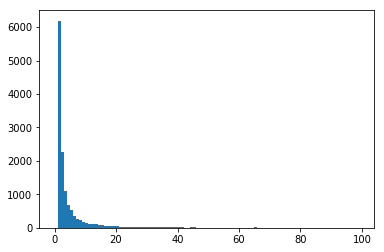

In [315]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)


#ここから問題37
surface_list = []
for line in datalist:
    surface_list.append(line['surface'])

#Counterで数え上げる
from collections import Counter

counter = Counter(surface_list)

wordlist = []
countlist = []
for word, count in counter.most_common():
    wordlist.append(word)
    countlist.append(count)


#グラフ作成
import numpy as np
import matplotlib.pyplot as plt

plt.hist(countlist, range(0,100))

39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

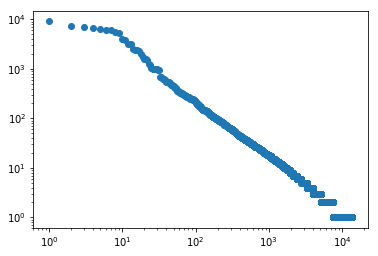

In [335]:
import MeCab
import re

#問題30で作成したdatalist
with open('neko.txt.mecab', "r") as f:
    data = f.read().split('\n')

POS_list = []
for line in data:
    if line == 'EOS': 
        continue
    POS = re.split(',|\\t', line)
    POS_list.append(POS)

POS_list2 = POS_list[0:-1] 

datalist = []
for line in POS_list2:
    dict = {'surface': line[0], 'base': line[7], 'pos': line[1], 'pos1': line[2]}
    datalist.append(dict)


#ここから問題39
surface_list = []
for line in datalist:
    surface_list.append(line['surface'])

#X軸 orderlist Y軸countlist
from collections import Counter

counter = Counter(surface_list)

countlist = []
for word, count in counter.most_common():
    countlist.append(count)

orderlist = range(1, len(countlist) +1)

#グラフ作成
import numpy as np
import matplotlib.pyplot as plt
    
plt.xscale('log')
plt.yscale('log')
plt.scatter(orderlist, countlist)
